<a href="https://colab.research.google.com/github/Puja29D/Sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv("/content/Twitter_Data.csv", encoding="latin-1")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df.head(5)

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.isnull().sum()

,0
clean_text,4
category,7


In [ ]:
df['clean_text'] = df['clean_text'].fillna("missing")


In [ ]:
df = df.dropna(subset=['category'])


In [ ]:

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+","", text)
    text = re.sub(r"@\w+","", text)
    text = re.sub(r"#","", text)
    text = re.sub(r"[^a-zA-Z ]","", text)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words])
    return text

df["cleaned"] = df["clean_text"].astype(str).apply(clean_text)

In [ ]:
df.head(5)

,clean_text,category,cleaned
0,when modi promised âminimum government maxim...,-1.0,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...


# Feature Engineering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["cleaned"])

# Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, df["category"], test_size=0.2, random_state=42
)


In [ ]:
# naive_bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb = MultinomialNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

print("NB Accuracy:", accuracy_score(y_test, pred_nb))
print(classification_report(y_test, pred_nb))


NB Accuracy: 0.7199570486270901
              precision    recall  f1-score   support

        -1.0       0.88      0.42      0.57      7230
         0.0       0.81      0.66      0.73     10961
         1.0       0.65      0.92      0.76     14404

    accuracy                           0.72     32595
   macro avg       0.78      0.67      0.69     32595
weighted avg       0.76      0.72      0.71     32595



# Data Visualization

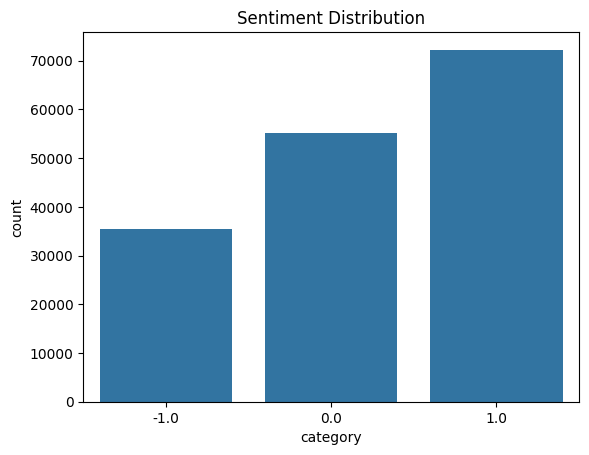

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["category"])
plt.title("Sentiment Distribution")
plt.show()


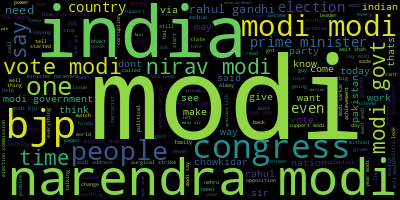

In [ ]:
from wordcloud import WordCloud

pos_text = " ".join(df[df["category"]==1]["cleaned"])
neg_text = " ".join(df[df["category"]==0]["cleaned"])

WordCloud().generate(pos_text).to_image()
WordCloud().generate(neg_text).to_image()
